# Exploratory Data Analysis (EDA)

This notebook explores the dataset at `data/raw/data.csv` to uncover patterns, identify data quality issues, and form hypotheses for feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Overview of the Data
- Shape of the dataset
- Data types
    

In [2]:
df.info()
print('Rows:', df.shape[0], 'Columns:', df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Summary Statistics
- Central tendency, dispersion, and shape of distributions
    

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribution of Numerical Features
- Visualize the distribution of numerical features
    

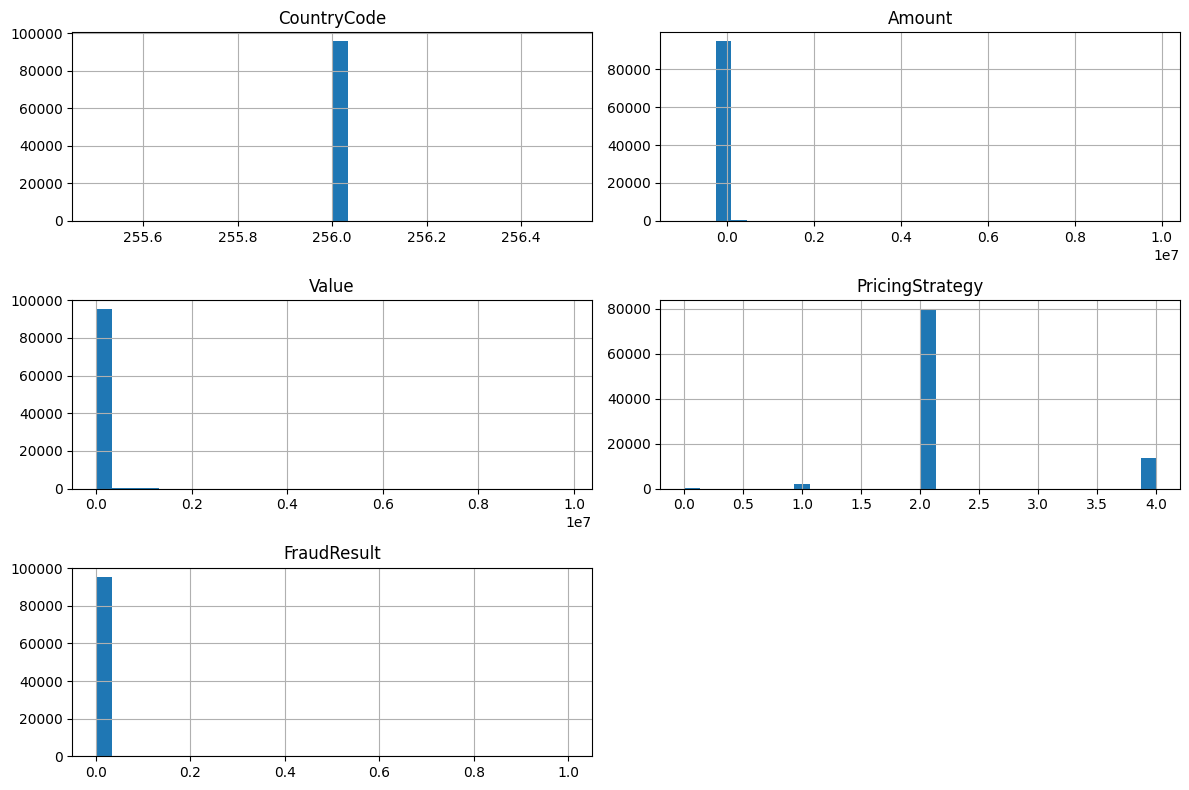

In [4]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

## Distribution of Categorical Features
- Frequency and variability of categories
    

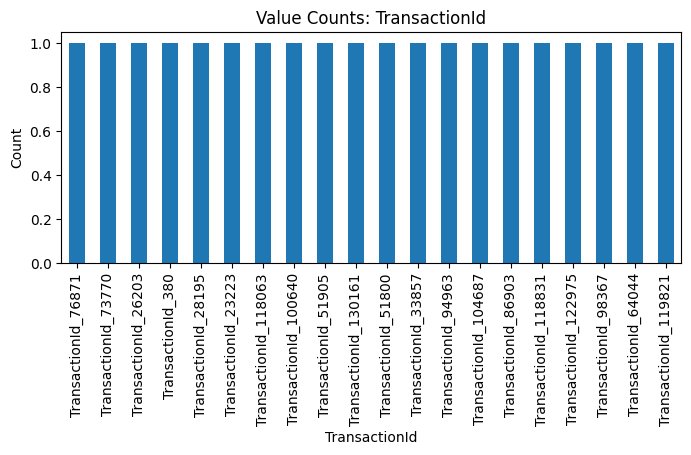

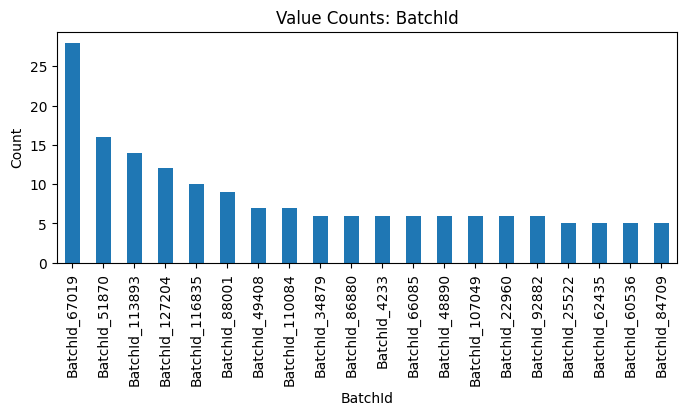

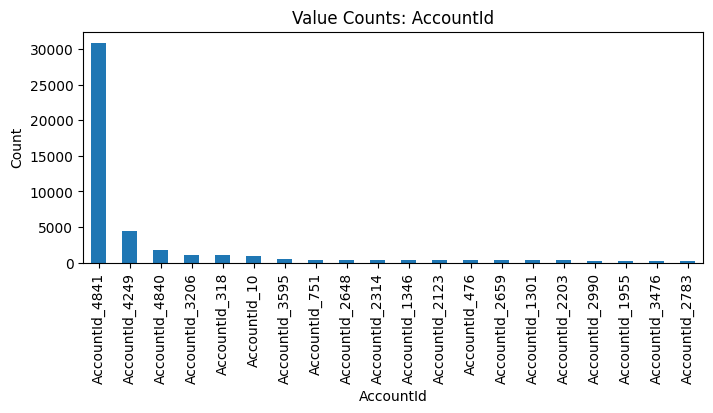

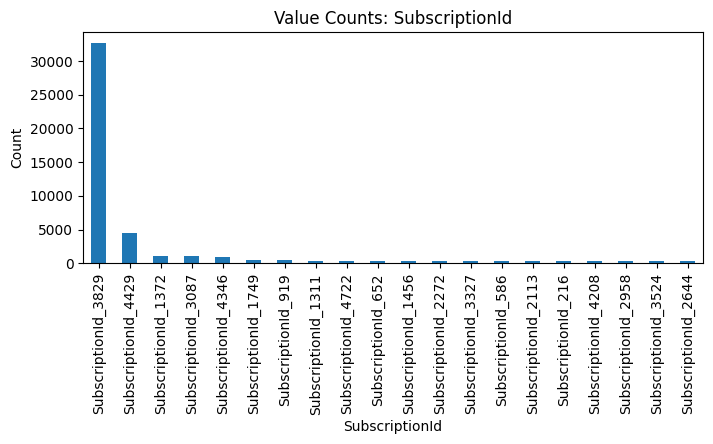

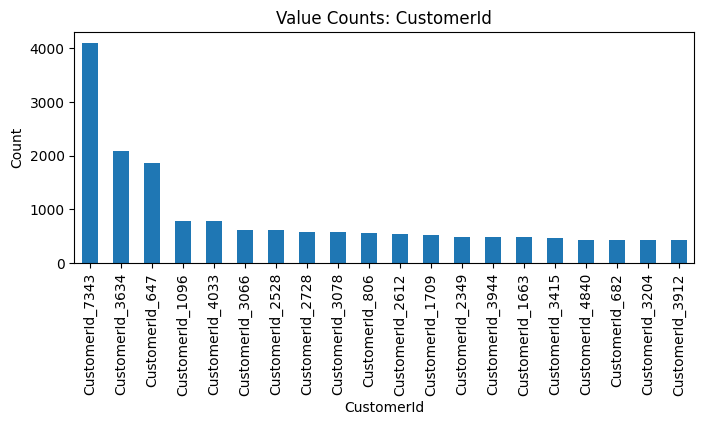

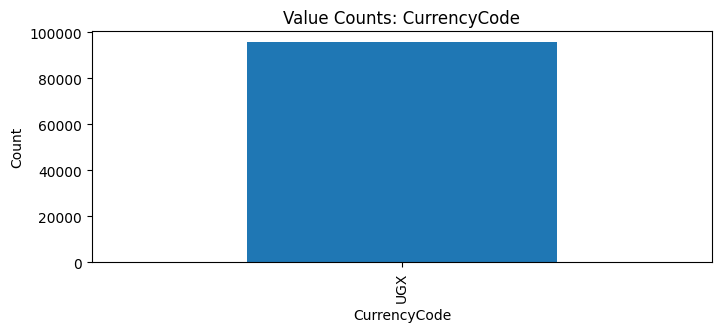

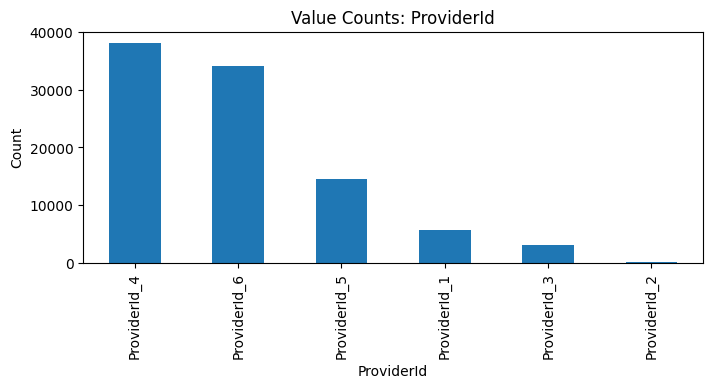

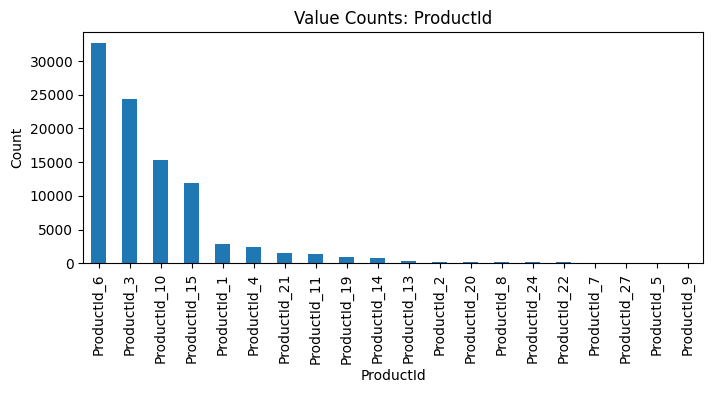

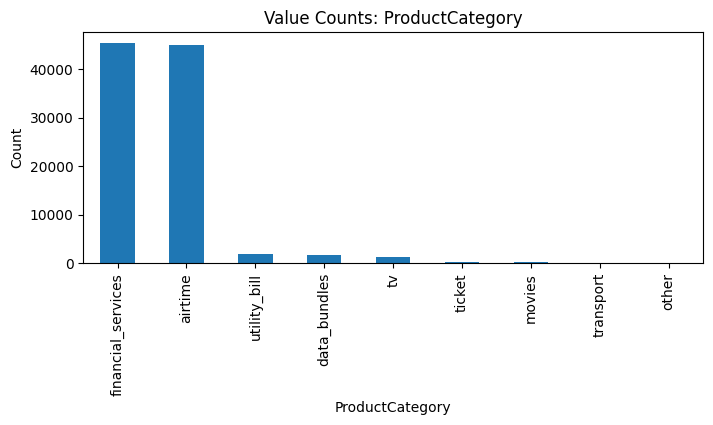

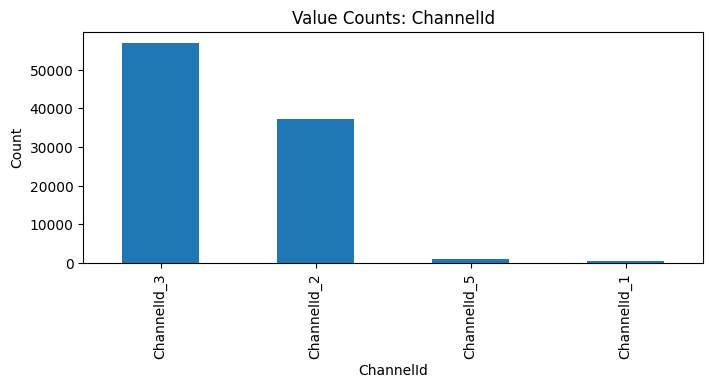

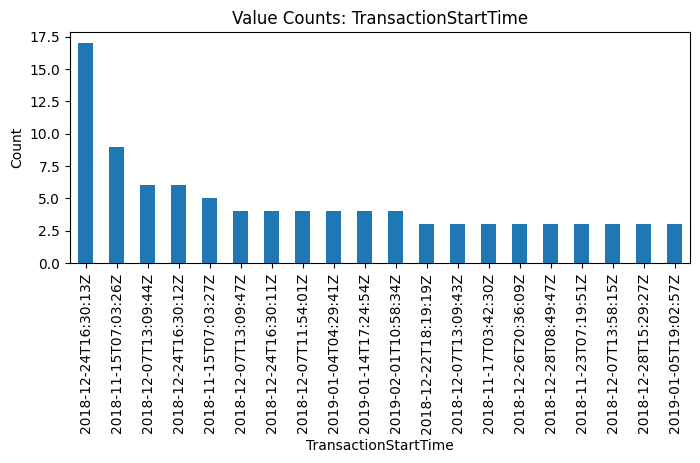

In [5]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'Value Counts: {col}')
    plt.ylabel('Count')
    plt.show()

## Correlation Analysis
- Correlation between numerical features
    

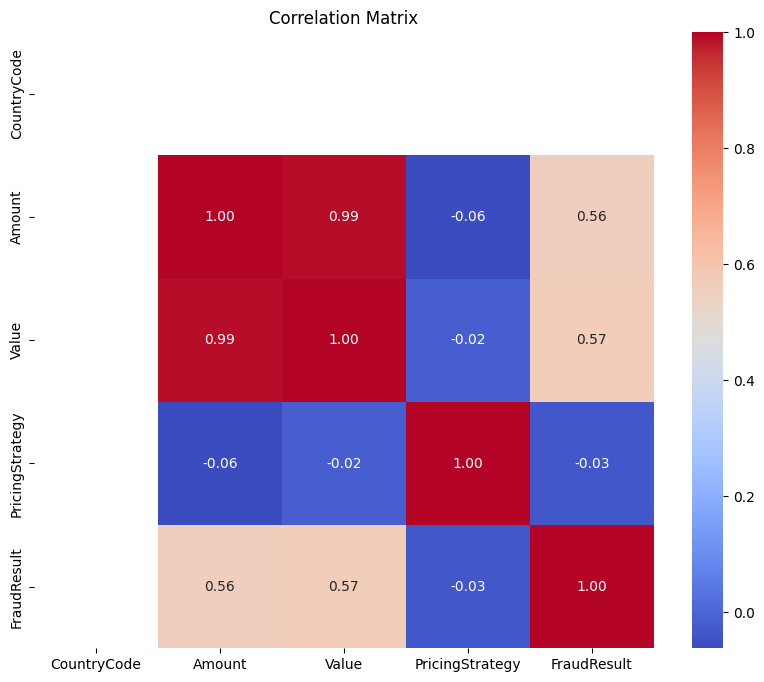

In [6]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Identifying Missing Values
- Missing value counts and percentages
    

In [10]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
if not missing.empty:
    print(missing)
else:
    print('No missing values detected.')

No missing values detected.


## Outlier Detection    

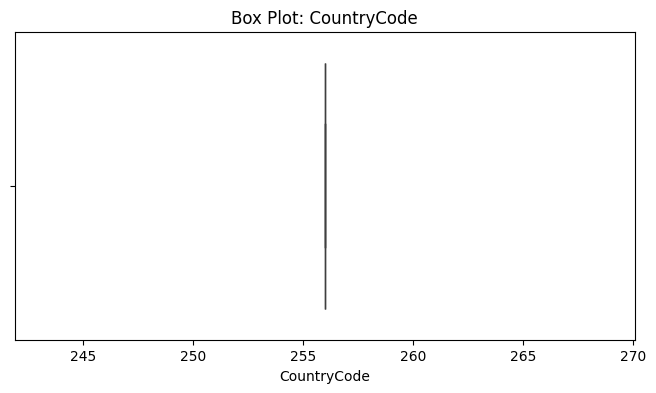

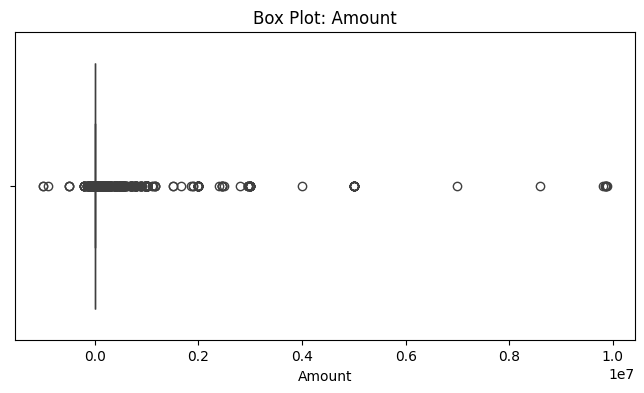

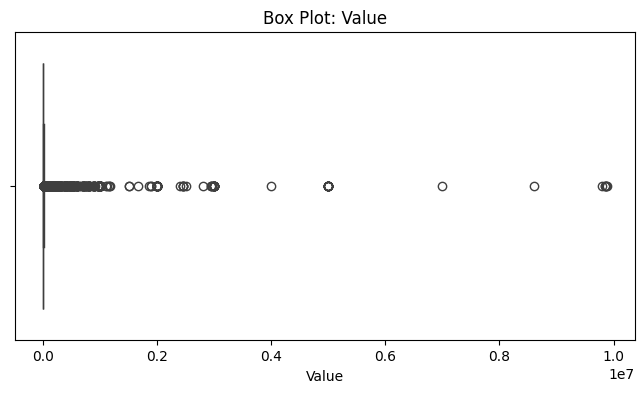

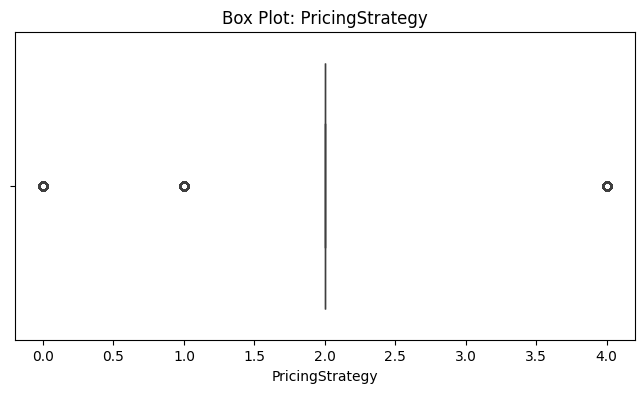

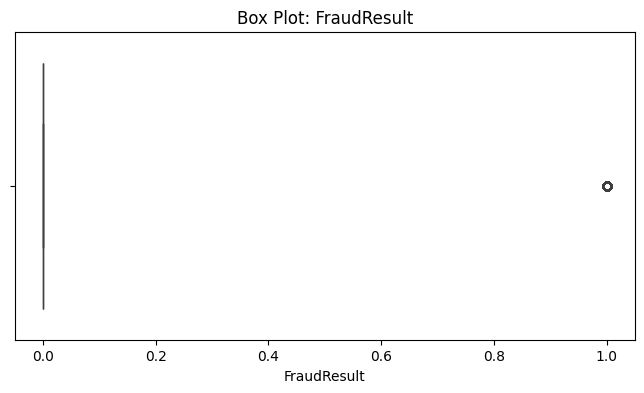

In [11]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot: {col}')
    plt.show()

## Top Insights

The top 3–5 most important findings here after running the above analyses.

1. **No Missing Values**  
   - The dataset is complete, with no missing values detected. This simplifies preprocessing and ensures that all features are available for analysis and modeling.

2. **Outlier Detection**  
   - The outlier detection visualizations (likely boxplots or similar) reveal the presence of significant outliers in several numerical features. Outliers can skew statistical analyses and impact model performance, so it’s important to review which features are most affected and consider appropriate handling (e.g., capping, transformation, or removal).  
   - The distribution of outliers may indicate underlying data quality issues or genuine rare events that could be important for credit risk modeling.

3. **Data Distribution Patterns**  
   - The plots generated during outlier analysis likely showed that some features have highly skewed distributions, possibly with long tails or extreme values. This suggests the need for feature scaling or transformation before modeling.  
   - Features with many outliers or heavy skew might be strong predictors of credit risk but may also require normalization or robust modeling techniques.

4. **Data Quality and Readiness**  
   - The absence of missing values and the identification of outliers together indicate that the dataset is generally clean but requires careful treatment of extreme values for optimal model performance.
